# Task 3 : Employee turnover prediction

by Luniva Shrestha

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing Dataset

In [2]:
df = pd.read_csv('Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


### Data Preprocessing and Exploratory Data Analysis

In [4]:
df.shape

(1470, 35)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [7]:
df.describe(include='object').T

,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
EducationField,1470,6,Life Sciences,606
Gender,1470,2,Male,882
JobRole,1470,9,Sales Executive,326
MaritalStatus,1470,3,Married,673
Over18,1470,1,Y,1470
OverTime,1470,2,No,1054


As shown above, the columns EmployeeCount, StandardHours and Over18 have same values for all rows. Also, EmployeeNumber refers to Employee Id that does not affect the results. 

Hence, these columns can be removed for further processes.

In [8]:
columns= ['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours']
df = df.drop(columns, axis=1)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [9]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [10]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [11]:
df.duplicated().any()

False

#### Converting attrition to numeric value using label encoder

In [12]:
from sklearn import preprocessing

In [13]:
label_encoder = preprocessing.LabelEncoder()
df['Attrition'] = label_encoder.fit_transform(df['Attrition'])
df['Attrition'].unique()

array([1, 0])

#### Grouping data based on the Attrition column

In [14]:
attrition_yes = df.loc[df['Attrition']==1]
attrition_no = df.loc[df['Attrition']==0]

In [15]:
yes = attrition_yes.describe().T
no = attrition_no.describe().T
compare = yes.join(no, lsuffix='_yes', rsuffix='_no')

compare.loc[:,['count_yes','mean_yes','min_yes','max_yes','count_no','mean_no','min_no','max_no']]

,count_yes,mean_yes,min_yes,max_yes,count_no,mean_no,min_no,max_no
Age,237.0,33.607595,18.0,58.0,1233.0,37.561233,18.0,60.0
Attrition,237.0,1.000000,1.0,1.0,1233.0,0.000000,0.0,0.0
DailyRate,237.0,750.362869,103.0,1496.0,1233.0,812.504461,102.0,1499.0
DistanceFromHome,237.0,10.632911,1.0,29.0,1233.0,8.915653,1.0,29.0
Education,237.0,2.839662,1.0,5.0,1233.0,2.927007,1.0,5.0
EnvironmentSatisfaction,237.0,2.464135,1.0,4.0,1233.0,2.771290,1.0,4.0
HourlyRate,237.0,65.573840,31.0,100.0,1233.0,65.952149,30.0,100.0
JobInvolvement,237.0,2.518987,1.0,4.0,1233.0,2.770479,1.0,4.0
JobLevel,237.0,1.637131,1.0,5.0,1233.0,2.145985,1.0,5.0
JobSatisfaction,237.0,2.468354,1.0,4.0,1233.0,2.778589,1.0,4.0


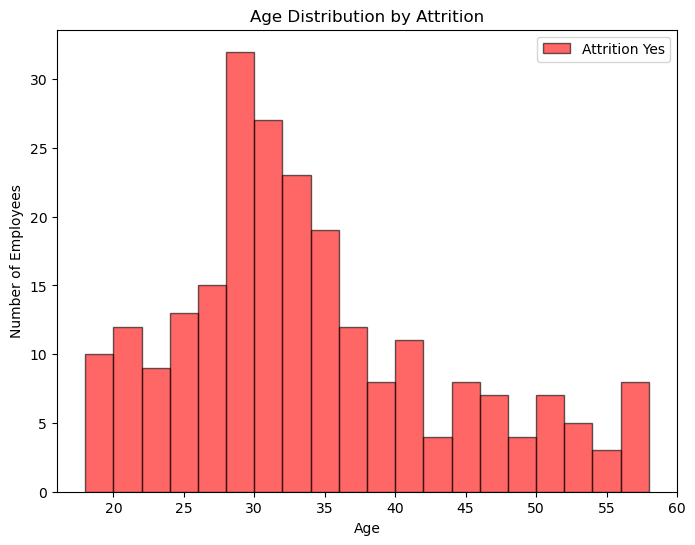

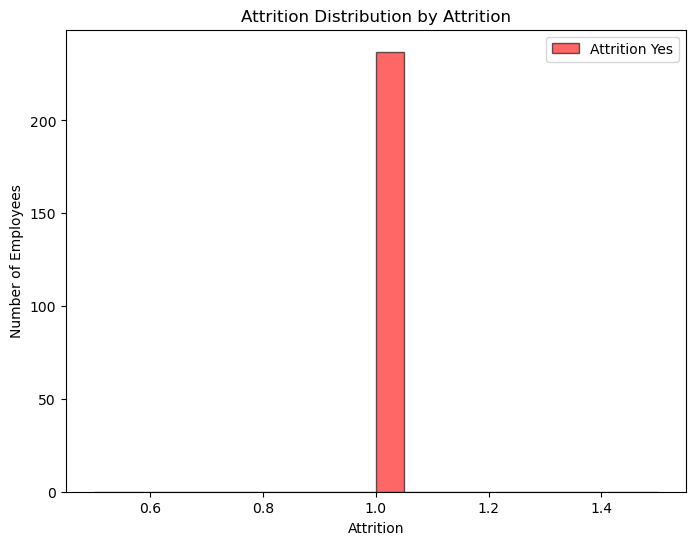

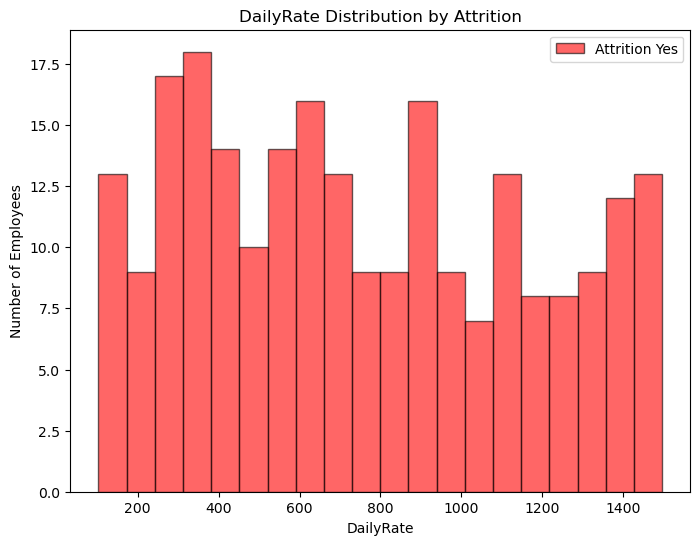

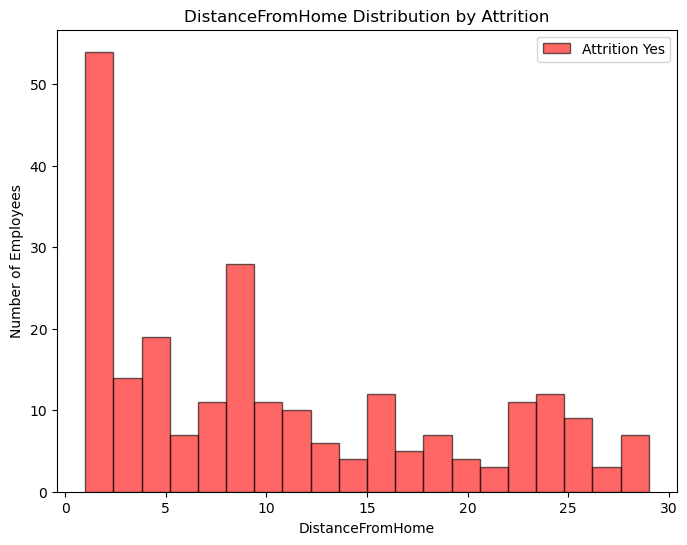

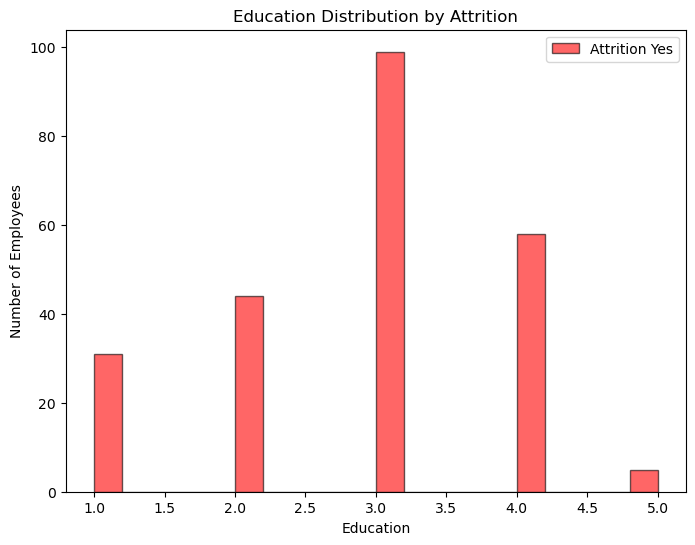

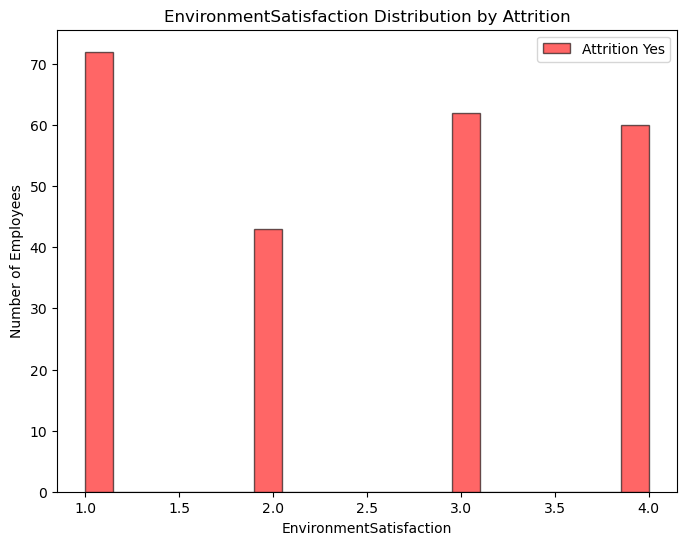

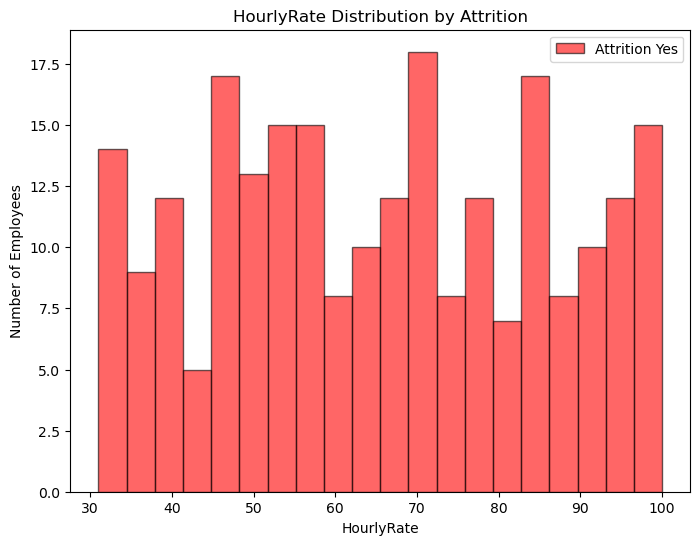

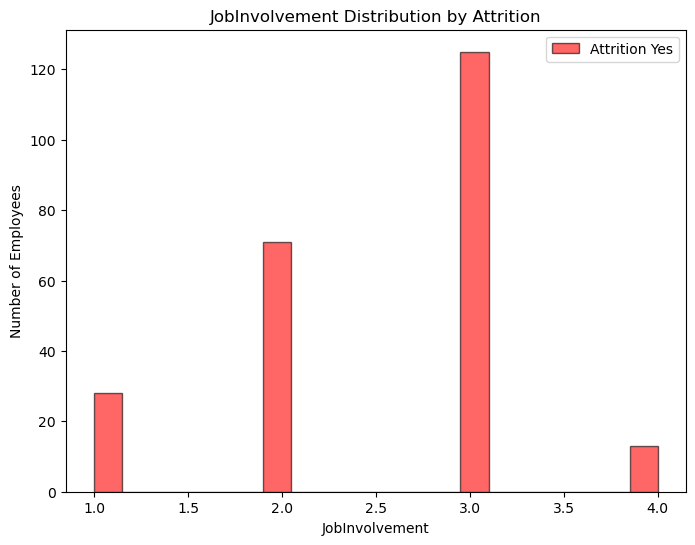

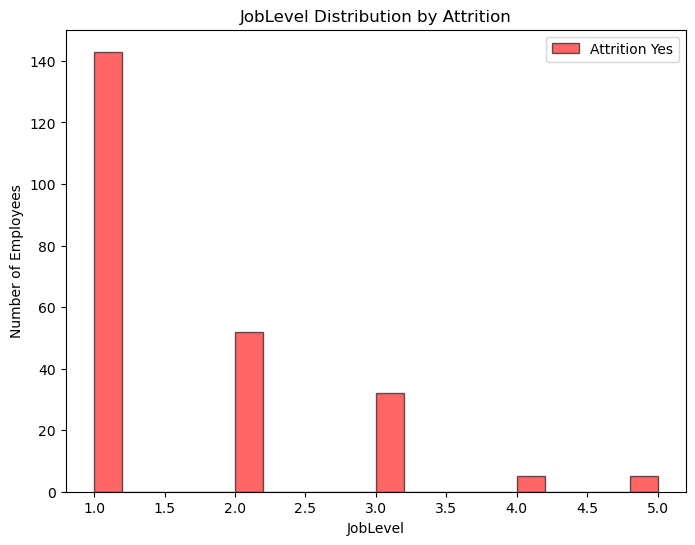

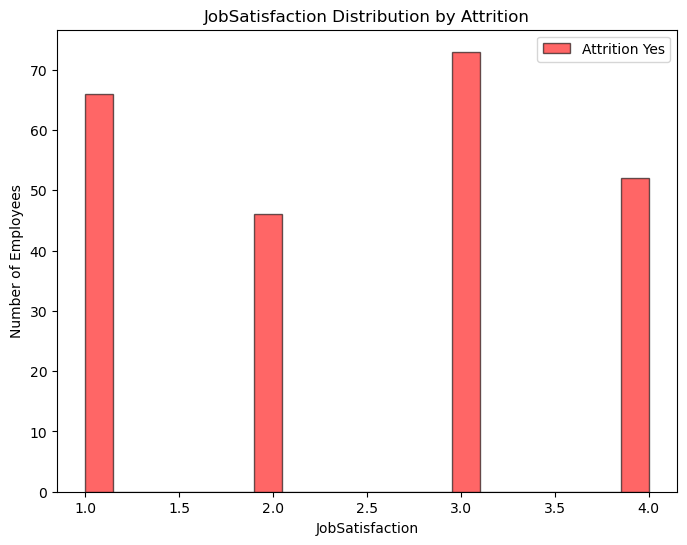

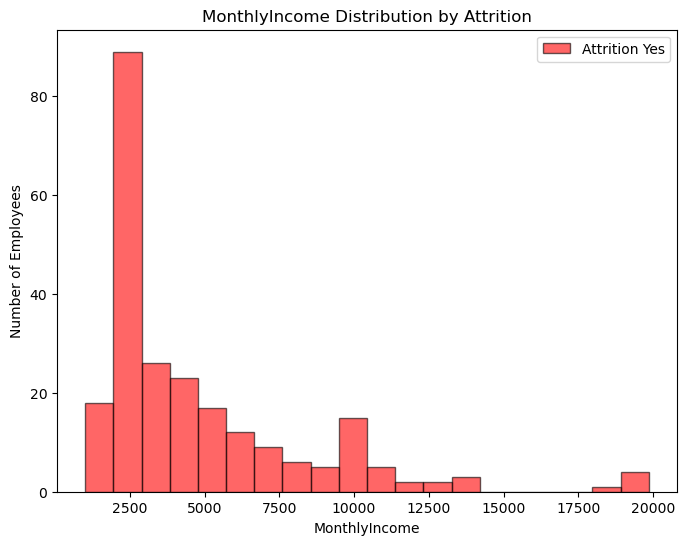

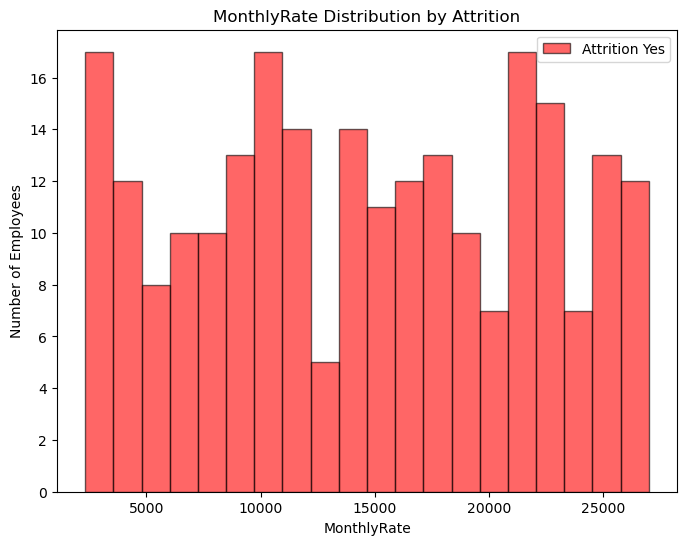

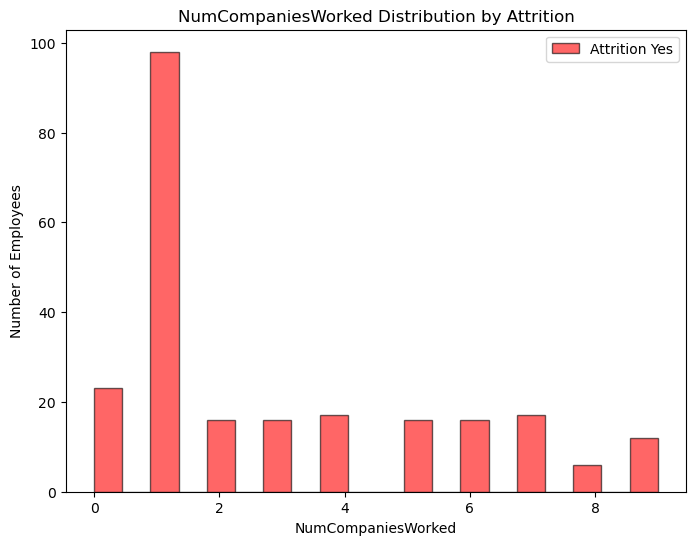

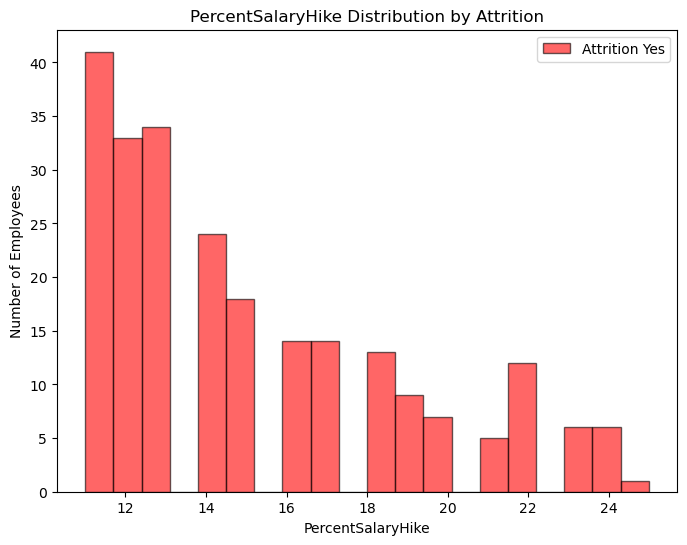

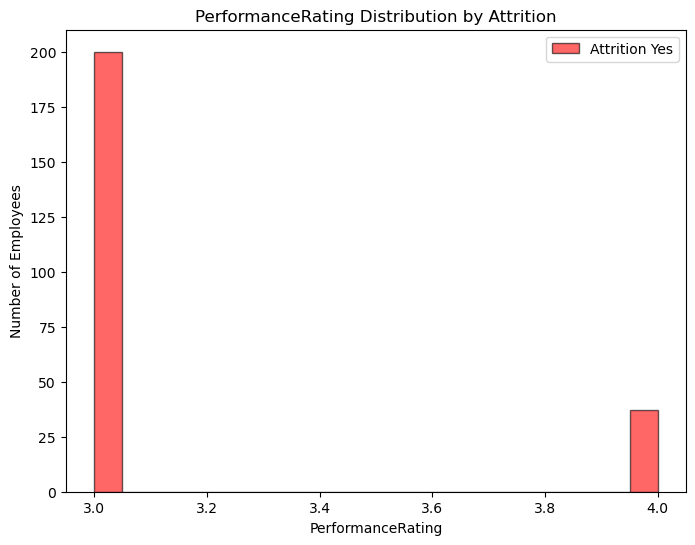

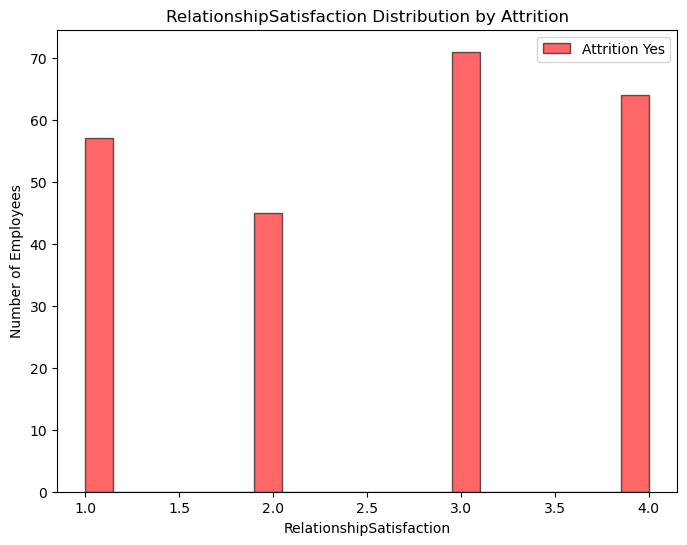

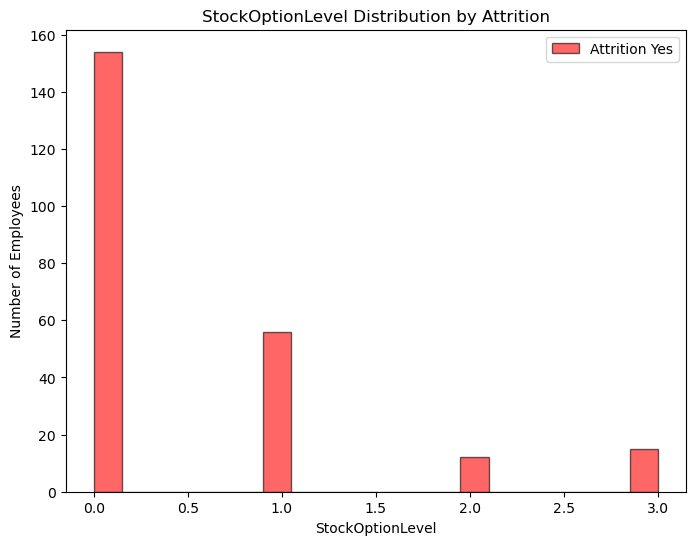

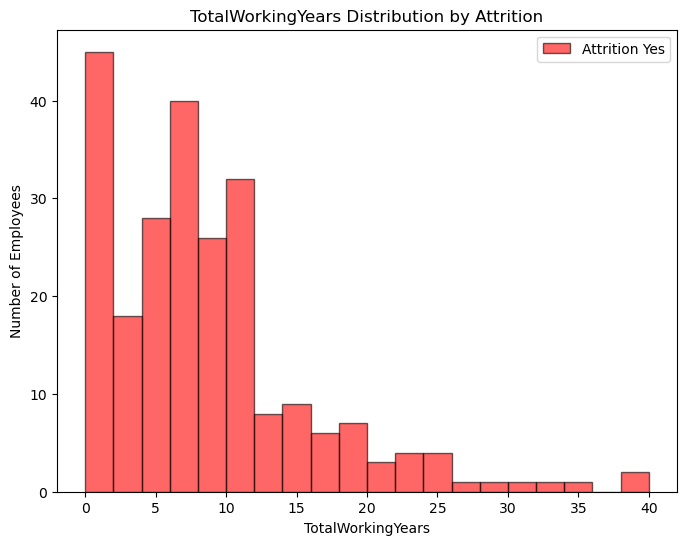

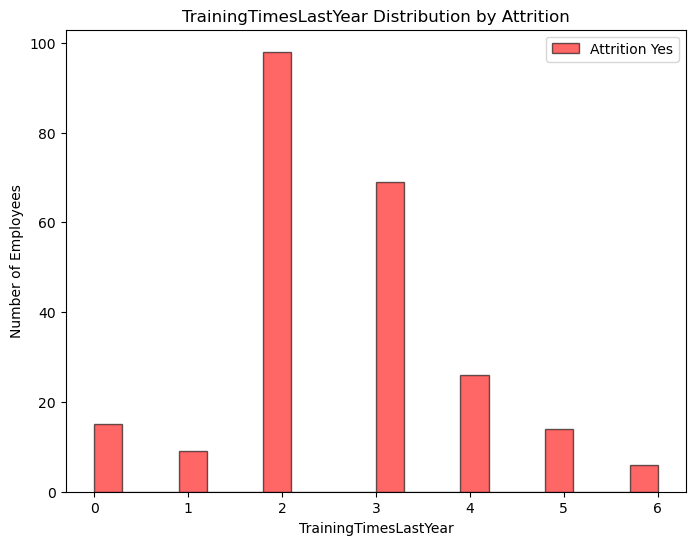

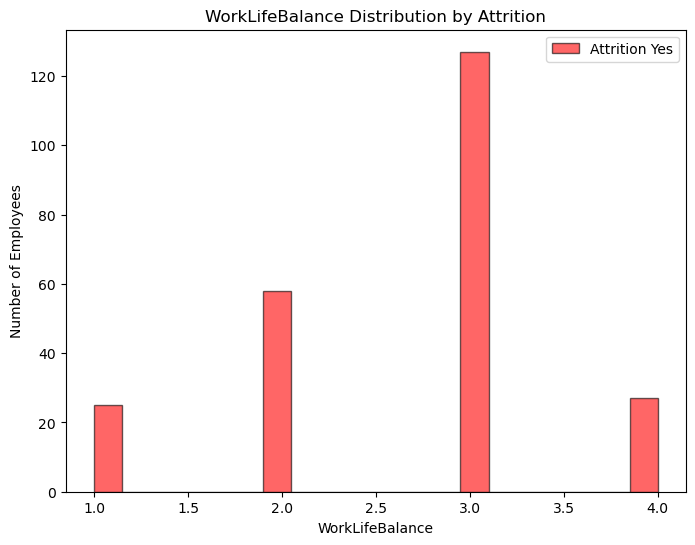

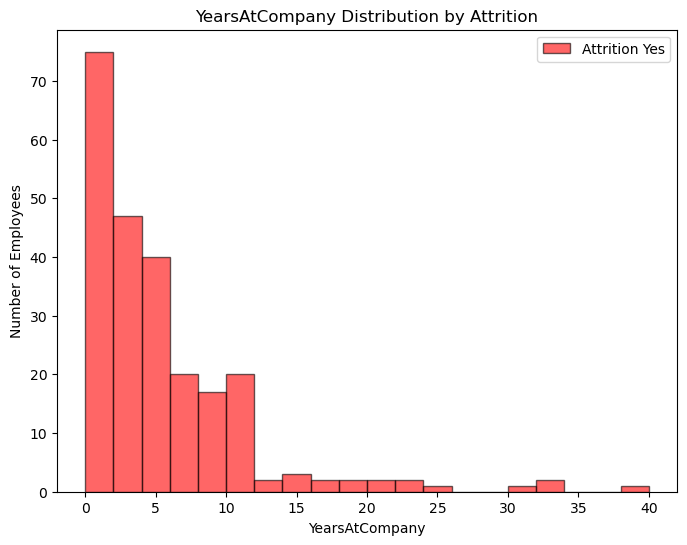

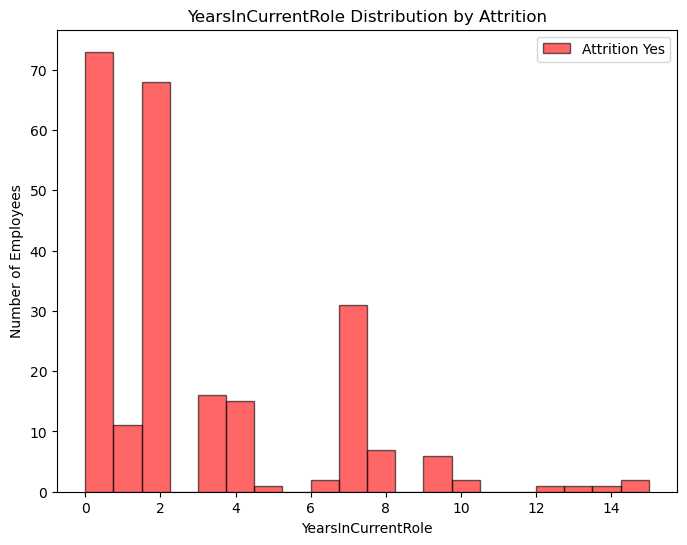

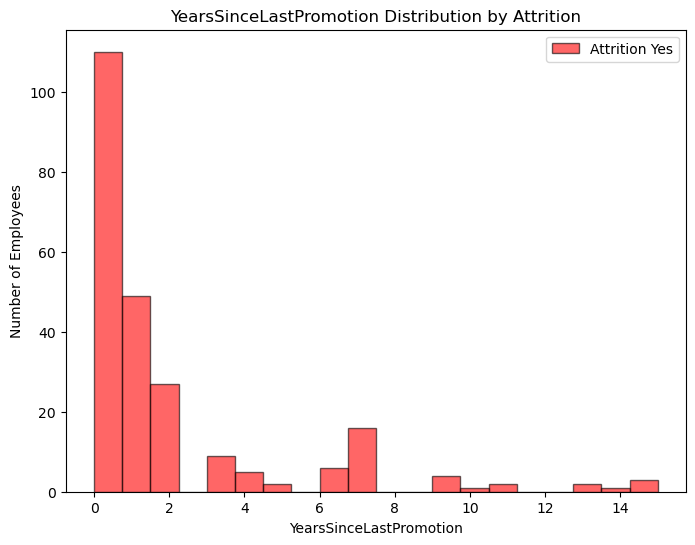

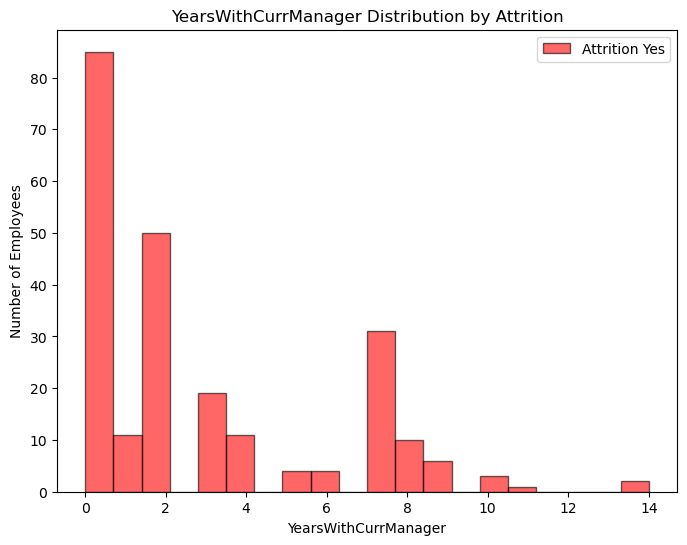

In [16]:
for column in df.columns:
    if df[column].dtype != 'object':
        plt.figure(figsize=(8, 6))
        #plt.hist(attrition_no[column], bins=20, alpha=0.1, label='Attrition No', color='blue', edgecolor='black')
        plt.hist(attrition_yes[column], bins=20, alpha=0.6, label='Attrition Yes', color='red', edgecolor='black')
        plt.xlabel(column) 
        plt.ylabel('Number of Employees')
        plt.title(f'{column} Distribution by Attrition')
        plt.legend()
        plt.show()

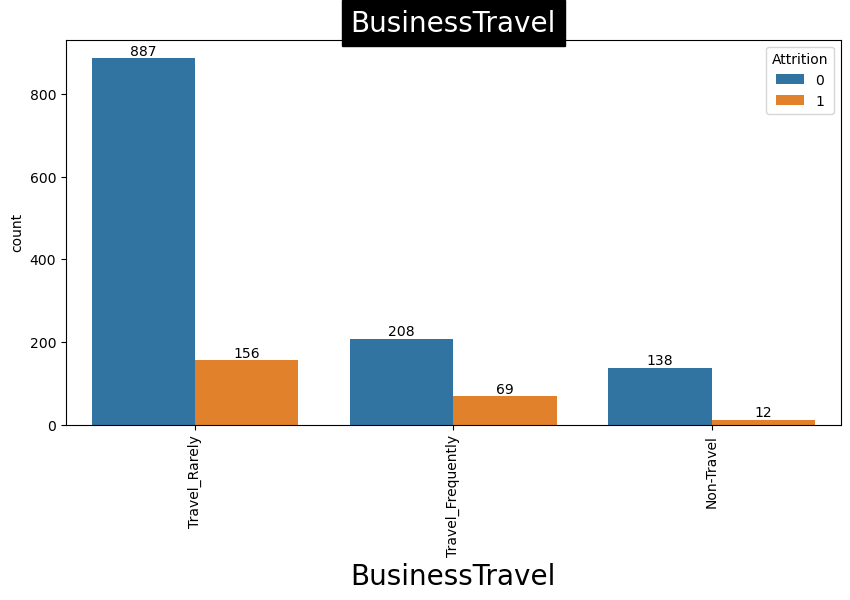

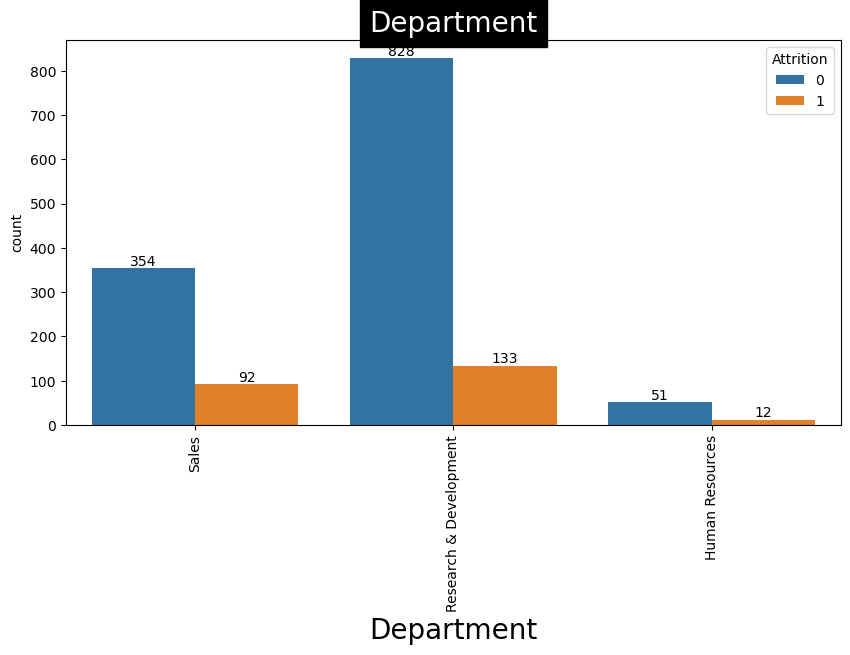

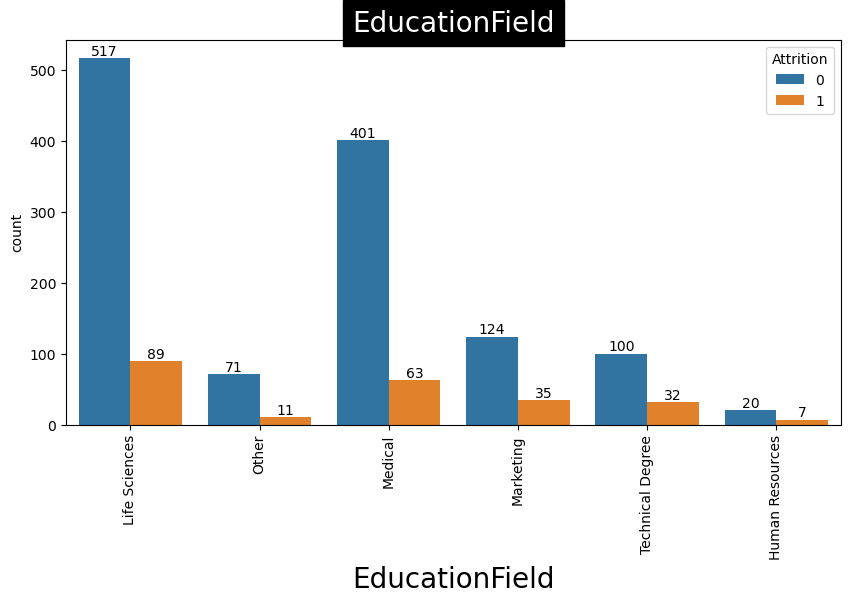

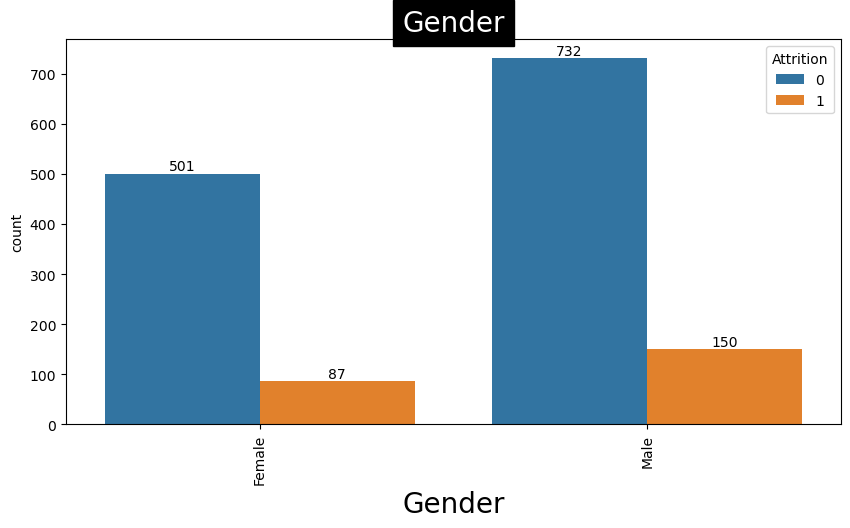

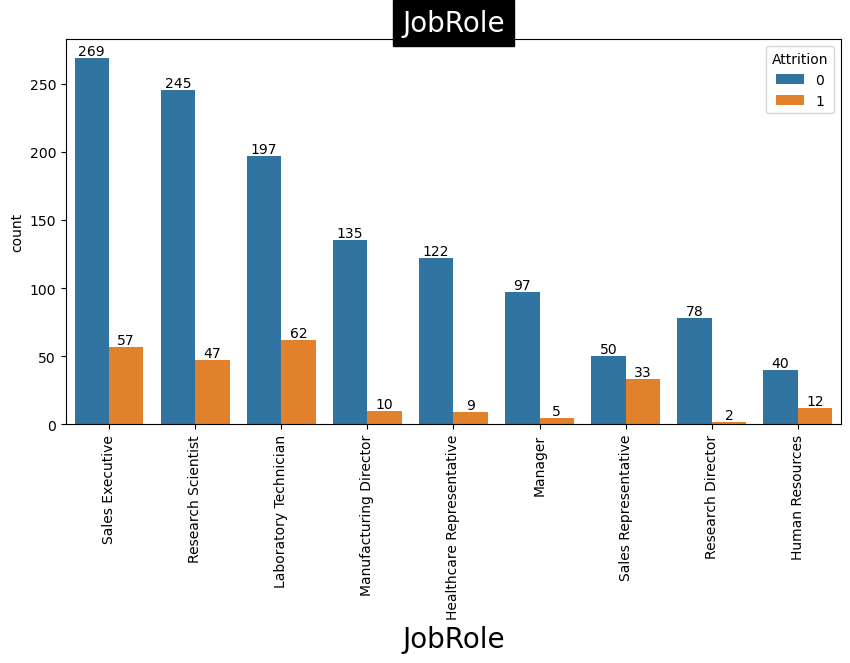

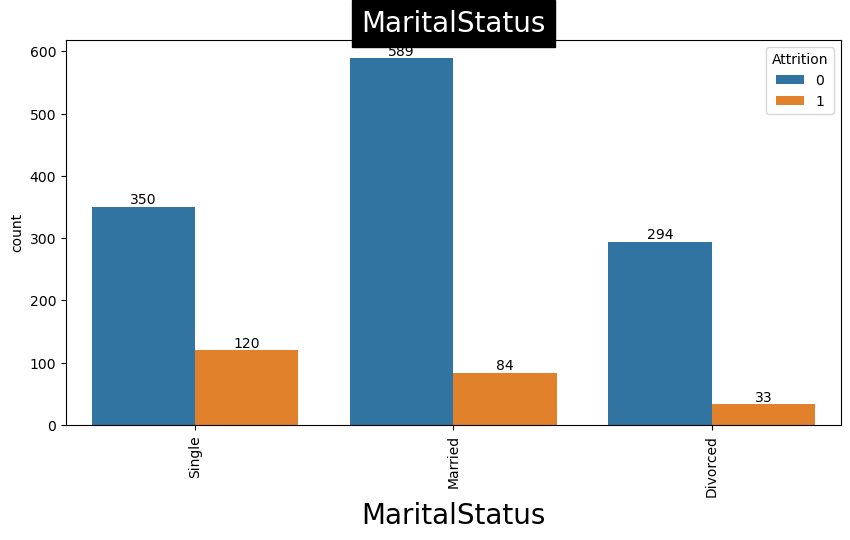

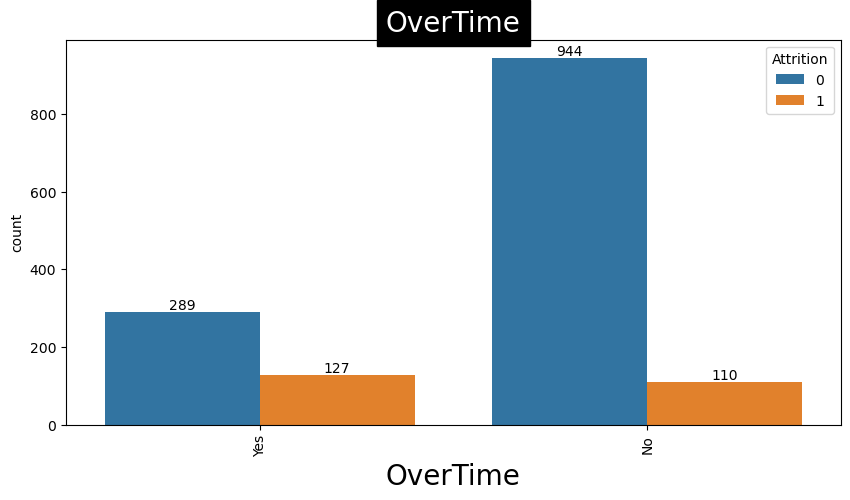

In [17]:
categorical = df.select_dtypes(['object']).columns
for col in categorical:
    plt.figure(figsize=(10,5))
    
    ax = sns.countplot(x=df[col],data=df,hue='Attrition')
    
    for container in ax.containers:
        ax.bar_label(container)
        
    plt.title(col,backgroundcolor='black',color='white',fontsize=20)
    plt.xticks(rotation=90)
    plt.xlabel(col,fontsize=20)
    plt.show()

### Converting other categorical values to numerical

In [18]:
df['BusinessTravel'].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [19]:
df['BusinessTravel'] = label_encoder.fit_transform(df['BusinessTravel'])
df['BusinessTravel'].unique()

array([2, 1, 0])

In [20]:
df['Department'].unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [21]:
df['Department'] = label_encoder.fit_transform(df['Department'])
df['Department'].unique()

array([2, 1, 0])

In [22]:
df['EducationField'].unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [23]:
df['EducationField'] = label_encoder.fit_transform(df['EducationField'])
df['EducationField'].unique()

array([1, 4, 3, 2, 5, 0])

In [24]:
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['JobRole'] = label_encoder.fit_transform(df['JobRole'])
df['MaritalStatus'] = label_encoder.fit_transform(df['MaritalStatus'])
df['OverTime'] = label_encoder.fit_transform(df['OverTime'])

<Axes: >

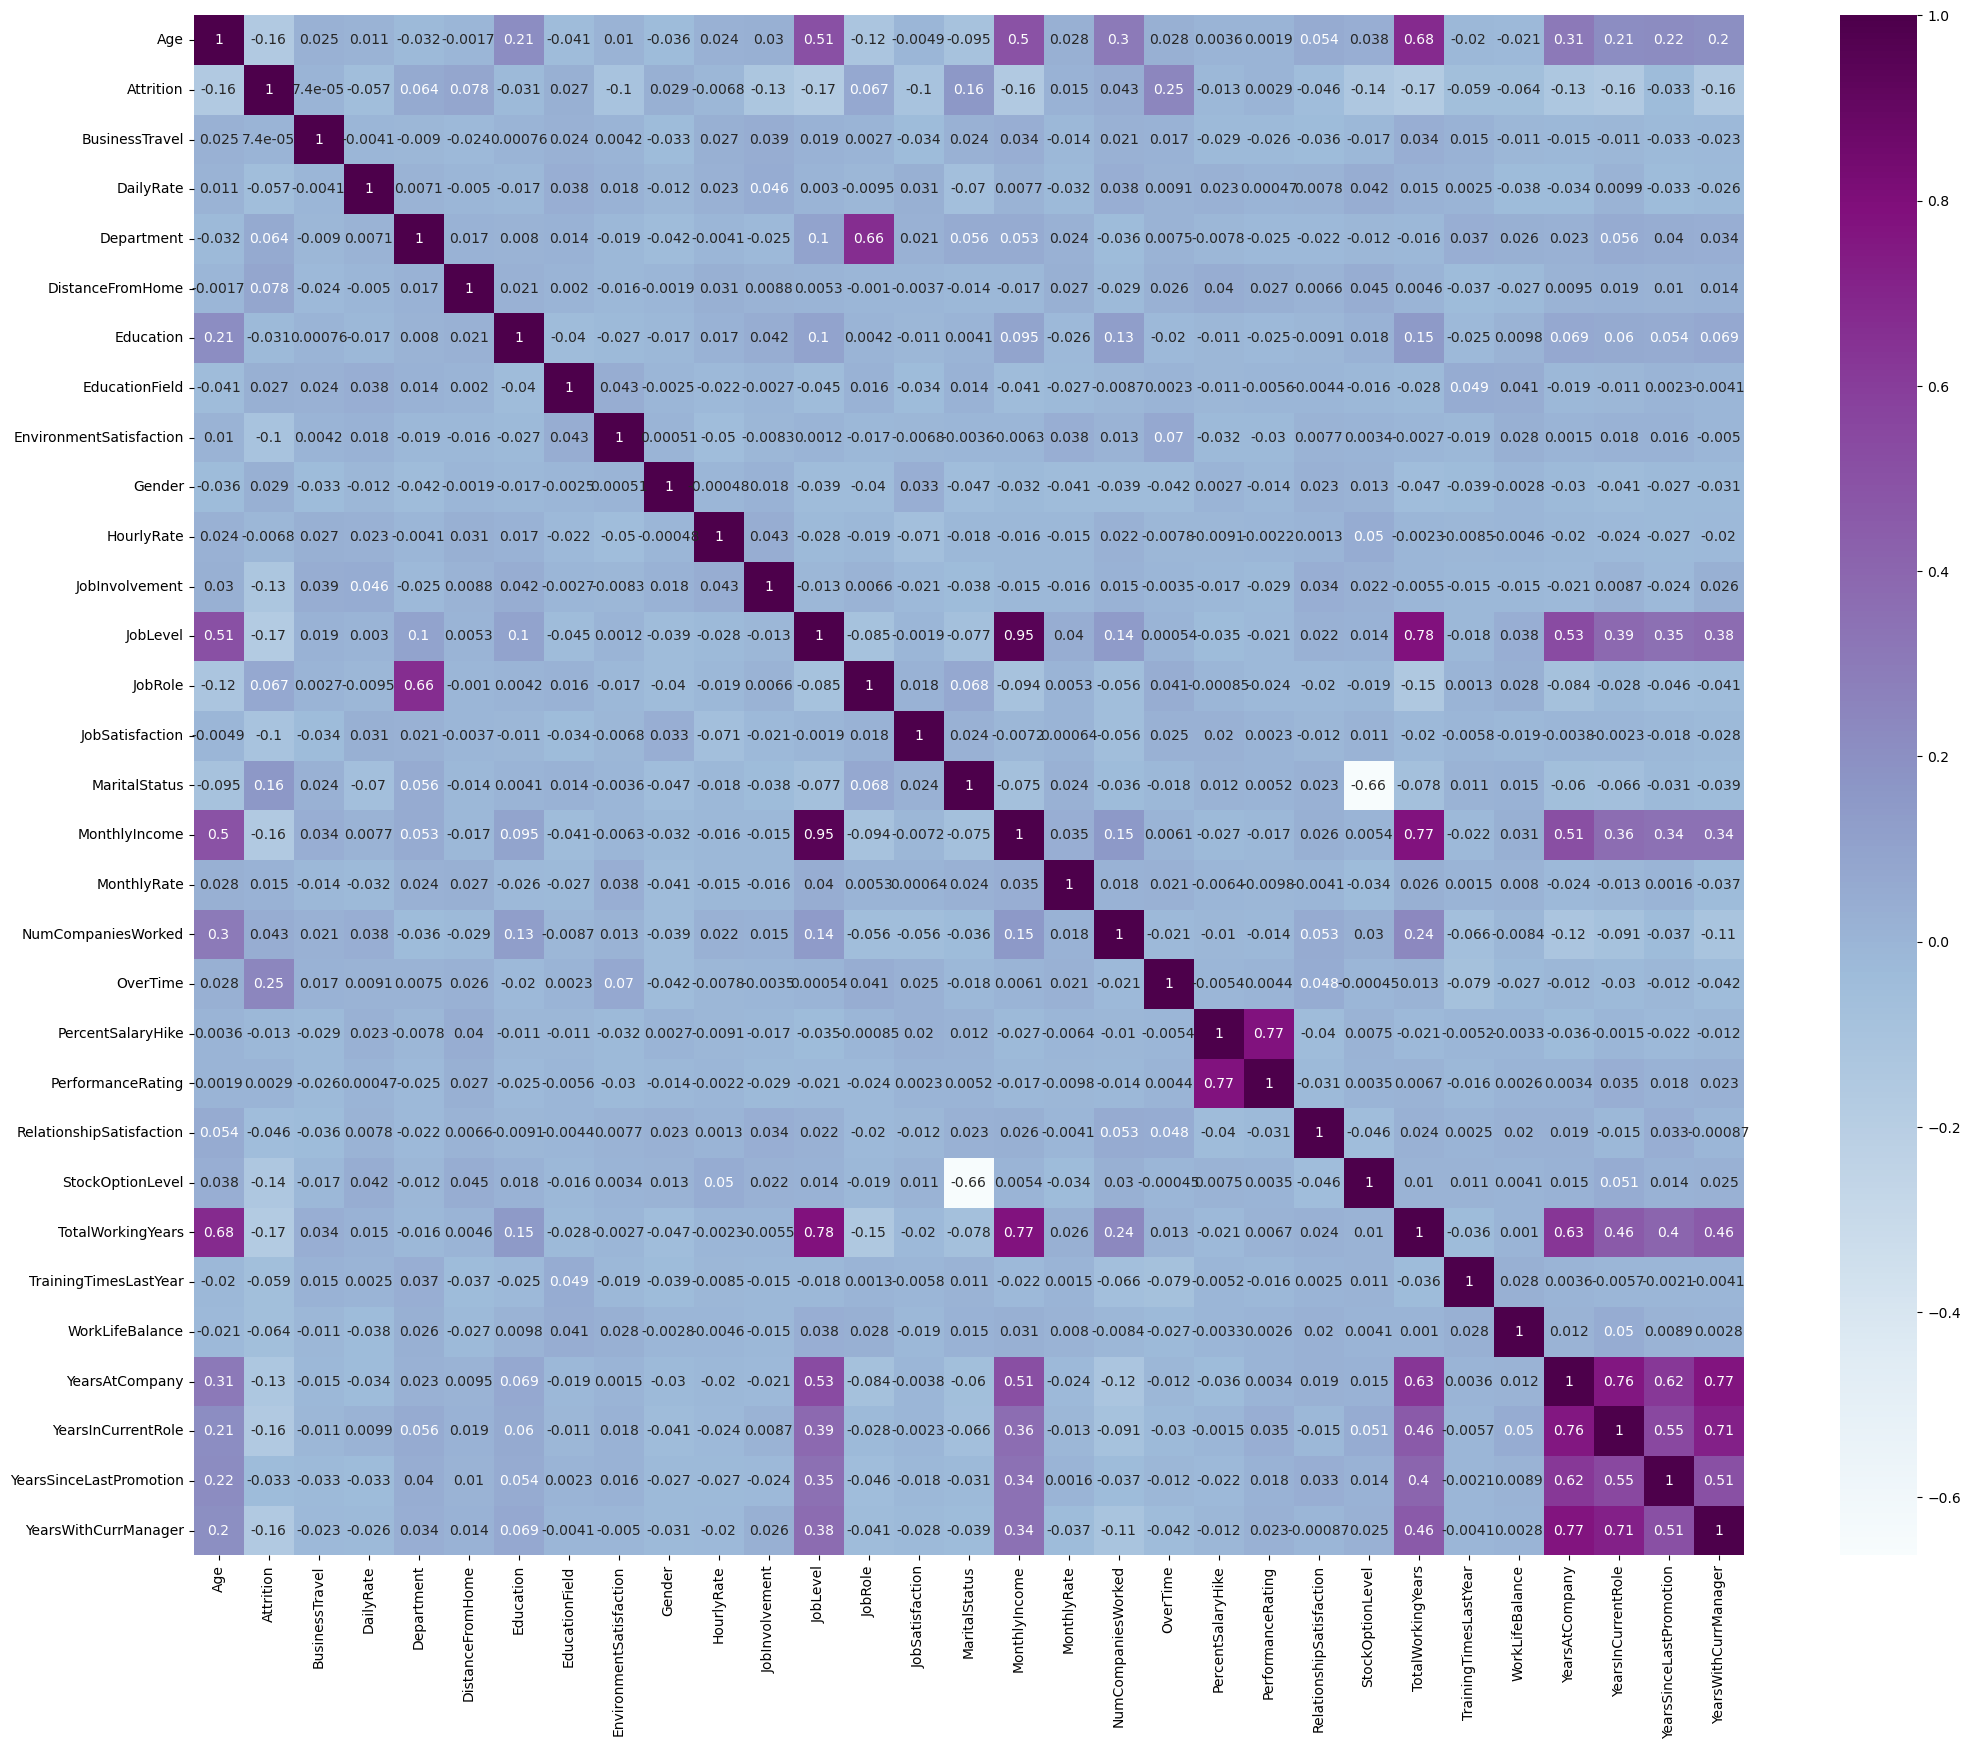

In [25]:
corr = df.corr()
plt.figure(figsize=(25,20))
sns.heatmap(corr, annot=True, cmap="BuPu")

There is a high correlation between MonthlyIncome and Joblevel.

#### Insights from EDA:
1. Employees between the age of 26 and 36 are more likely to leave.
2. Employees with bachelor's degree are more likely to leave while those with doctorate are more likely to stay.
3. Employees with high job involvement are more likely to leave.
4. Employees having lower level jobs have high probability of leaving.
5. Employees with low monthly income are more likely to leave.
6. Employees who have previously worked at only one company have higher probability of levaing.
7. Employees with small Percent Salary Hike have greater probability of attrition.
8. Low stock option level results in increased chance of attrition.
9. Employees with 12 or less than 12 total working years and years at company are more likely to leave.
10. Employees who are single and works overtime are more likely to leave.

In [26]:
df.drop('MonthlyIncome', axis=1, inplace=True)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2


### Feature Engineering

In [27]:
from sklearn.preprocessing import MinMaxScaler

In [28]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df,columns=df.columns)

In [29]:
scaled_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.547619,1.0,1.0,0.715820,1.0,0.000000,0.25,0.2,0.333333,0.0,...,0.0,0.000000,0.000000,0.200,0.0,0.000000,0.15,0.222222,0.000000,0.294118
1,0.738095,0.0,0.5,0.126700,0.5,0.250000,0.00,0.2,0.666667,1.0,...,1.0,1.000000,0.333333,0.250,0.5,0.666667,0.25,0.388889,0.066667,0.411765
2,0.452381,1.0,1.0,0.909807,0.5,0.035714,0.25,0.8,1.000000,1.0,...,0.0,0.333333,0.000000,0.175,0.5,0.666667,0.00,0.000000,0.000000,0.000000
3,0.357143,0.0,0.5,0.923407,0.5,0.071429,0.75,0.2,1.000000,0.0,...,0.0,0.666667,0.000000,0.200,0.5,0.666667,0.20,0.388889,0.200000,0.000000
4,0.214286,0.0,1.0,0.350036,0.5,0.035714,0.00,0.6,0.000000,1.0,...,0.0,1.000000,0.333333,0.150,0.5,0.666667,0.05,0.111111,0.133333,0.117647


#### Storing Feature variable in X and Target Variable in Y

In [30]:
X = scaled_df.drop('Attrition', axis=1)
X.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.547619,1.0,0.715820,1.0,0.000000,0.25,0.2,0.333333,0.0,0.914286,...,0.0,0.000000,0.000000,0.200,0.0,0.000000,0.15,0.222222,0.000000,0.294118
1,0.738095,0.5,0.126700,0.5,0.250000,0.00,0.2,0.666667,1.0,0.442857,...,1.0,1.000000,0.333333,0.250,0.5,0.666667,0.25,0.388889,0.066667,0.411765
2,0.452381,1.0,0.909807,0.5,0.035714,0.25,0.8,1.000000,1.0,0.885714,...,0.0,0.333333,0.000000,0.175,0.5,0.666667,0.00,0.000000,0.000000,0.000000
3,0.357143,0.5,0.923407,0.5,0.071429,0.75,0.2,1.000000,0.0,0.371429,...,0.0,0.666667,0.000000,0.200,0.5,0.666667,0.20,0.388889,0.200000,0.000000
4,0.214286,1.0,0.350036,0.5,0.035714,0.00,0.6,0.000000,1.0,0.142857,...,0.0,1.000000,0.333333,0.150,0.5,0.666667,0.05,0.111111,0.133333,0.117647


In [31]:
Y = scaled_df['Attrition']
Y.head()

0    1.0
1    0.0
2    1.0
3    0.0
4    0.0
Name: Attrition, dtype: float64

### ML Model

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [33]:
model_df = {}
def model_val(model,X,Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.20, random_state=0)
    model.fit(X_train,Y_train)
    y_pred = model.predict(X_test)
    print(f"{model} accuracy: {accuracy_score(Y_test,y_pred)}")
    
    score = cross_val_score(model, X, Y, cv=5)
    print(f"{model} Average cross value score: {np.mean(score)}")
    model_df[model] = round(np.mean(score)*100,2)

### Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model_val(model,X,Y)

LogisticRegression() accuracy: 0.8809523809523809
LogisticRegression() Average cross value score: 0.8693877551020408


In [35]:
model_df

{LogisticRegression(): 86.94}

### SVM

In [36]:
from sklearn import svm

model = svm.SVC()
model_val(model,X,Y)

SVC() accuracy: 0.8673469387755102
SVC() Average cross value score: 0.863265306122449


### Decision Tree

In [37]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model_val(model,X,Y)

DecisionTreeClassifier() accuracy: 0.7857142857142857
DecisionTreeClassifier() Average cross value score: 0.7809523809523811


### Random Forest Classifier

In [38]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model_val(model,X,Y)

RandomForestClassifier() accuracy: 0.8537414965986394
RandomForestClassifier() Average cross value score: 0.858503401360544


In [39]:
model_df

{LogisticRegression(): 86.94,
 SVC(): 86.33,
 DecisionTreeClassifier(): 78.1,
 RandomForestClassifier(): 85.85}

### Hypertuning

In [40]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [41]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    },
    'decision_tree' : {
        'model': DecisionTreeClassifier(),
        'params': {
            'decisiontreeclassifier__max_depth': [2, 3, 5, 10, 20],
            'decisiontreeclassifier__min_samples_leaf': [5, 10, 20, 50, 100],
            'decisiontreeclassifier__criterion': ["gini", "entropy"]
        }
    }
}

In [42]:
scores = []
best_estimators = {}
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.20, random_state=0)
for algo, mp in model_params.items():
    pipe = make_pipeline(MinMaxScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, Y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
model_data = pd.DataFrame(scores,columns=['model','best_score','best_params'])
model_data   

,model,best_score,best_params
0,svm,0.866491,"{'svc__C': 100, 'svc__kernel': 'rbf'}"
1,random_forest,0.852038,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.863952,{'logisticregression__C': 1}
3,decision_tree,0.849495,{'decisiontreeclassifier__criterion': 'entropy...


### Saving the model

In [43]:
model_data.loc[0,'best_params']

{'svc__C': 100, 'svc__kernel': 'rbf'}

In [44]:
rf = svm.SVC(
    kernel='rbf', C=100
)
rf.fit(X,Y)

SVC(C=100)

In [45]:
import joblib

In [46]:
joblib.dump(rf,'Employee_turnover_prediction')

['Employee_turnover_prediction']

### Loading the model

In [47]:
turnover_model = joblib.load('Employee_turnover_prediction')

### Prediction

In [81]:
data = pd.DataFrame({
    'Age': 43,
    'BusinessTravel': 0,
    'DailyRate': 1273,
    'Department': 1,
    'DistanceFromHome':2,
    'Education':2,
    'EducationField':3,
    'EnvironmentSatisfaction':4,
    'Gender':0,
    'HourlyRate': 72,
    'JobInvolvement': 2,
    'JobLevel': 5,
    'JobRole': 2,
    'JobSatisfaction': 3,
    'MaritalStatus': 0,
    'MonthlyRate': 21998,
    'NumCompaniesWorked':1,
    'OverTime':0,
    'PercentSalaryHike': 12,
    'PerformanceRating': 3,
    'RelationshipSatisfaction': 4,
    'StockOptionLevel':2,
    'TotalWorkingYears':6,
    'TrainingTimesLastYear': 3,
    'WorkLifeBalance': 2,
    'YearsAtCompany':5,
    'YearsInCurrentRole':3,
    'YearsSinceLastPromotion':1,
    'YearsWithCurrManager':4,
},index=[0])

In [82]:
data

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,43,0,1273,1,2,2,3,4,0,72,...,3,4,2,6,3,2,5,3,1,4


In [83]:
result = model.predict(data)
if result == 1:
    print('Employee is likely to leave')
else:
    print('Employee is not likely to leave.')

Employee is likely to leave
